In [20]:
%matplotlib inline
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd

#Instantiate locations of data files
cityData = 'Resources/city_data.csv'
rideData = 'Resources/ride_data.csv'

#Reading city_data.csv to a DataFrame
cityDf = pd.read_csv(cityData)
cityDf.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [21]:
#Reading ride_data.csv to a DataFrame
rideDf = pd.read_csv(rideData)
rideDf.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [22]:
#checking for missing values
cityDf.count()

city            120
driver_count    120
type            120
dtype: int64

In [23]:
#Checking for missing values
cityDf.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [24]:
#Checking data types
cityDf.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [25]:
#Getting the different city types
cityDf['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [26]:
#Getting the count of "Urban" data points
sum(cityDf['type']=='Urban')

66

In [27]:
#Getting the count of "Rural" data points
sum(cityDf['type']=='Rural')

18

In [28]:
#Getting the count of "Suburban" data points
sum(cityDf['type']=='Suburban')

36

In [29]:
#Checking rideDf for missing values
rideDf.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [30]:
#Checking rideDf for missing values
rideDf.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [31]:
#Checking rideDf data types
rideDf.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [32]:
#Combining the data into a single dataset
pyberDataDf = pd.merge(rideDf, cityDf, how='left', on=['city','city'])
pyberDataDf.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [33]:
#Creating Urban city DataFrame
urbanCitiesDf = pyberDataDf[pyberDataDf['type']=='Urban']
#Creating Rural city DataFrame
ruralCitiesDf = pyberDataDf[pyberDataDf['type']=='Rural']
#Creating Suburban city DataFrame
subCitiesDf = pyberDataDf[pyberDataDf['type']=='Suburban']

In [34]:
# Getting the number of rides for urban cities.
urbanRideCount = urbanCitiesDf.groupby(['city']).count()['ride_id']
subRideCount = subCitiesDf.groupby(['city']).count()['ride_id']
ruralRideCount = ruralCitiesDf.groupby(['city']).count()['ride_id']
urbanRideCount.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [38]:
# Getting average fare for each city in the urban cities.
urbanAvgFare = urbanCitiesDf.groupby(['city']).mean()['fare']
ruralAvgFare = ruralCitiesDf.groupby(['city']).mean()['fare']
subAvgFare = subCitiesDf.groupby(['city']).mean()['fare']
urbanAvgFare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [40]:
urbanDriverCount = urbanCitiesDf.groupby(['city']).mean()['driver_count']
ruralDriverCount = ruralCitiesDf.groupby(['city']).mean()['driver_count']
subDriverCount = subCitiesDf.groupby(['city']).mean()['driver_count']
urbanDriverCount.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

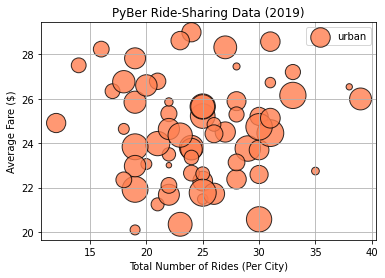

In [43]:
# Building the scatter plots for urban cities.
plt.scatter(urbanRideCount, urbanAvgFare, 
            s=10*urbanDriverCount, c='coral', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

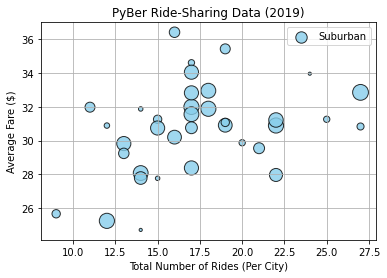

In [45]:
# Building the scatter plots for suburban cities.
plt.scatter(subRideCount, subAvgFare, 
            s=10*subDriverCount, c='skyblue', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

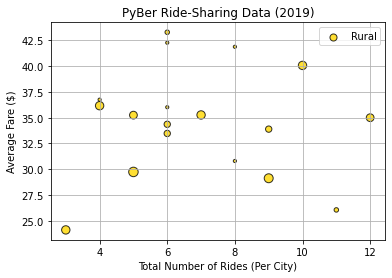

In [46]:
# Building the scatter plots for rural cities.
plt.scatter(ruralRideCount, ruralAvgFare, 
            s=10*ruralDriverCount, c='gold', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

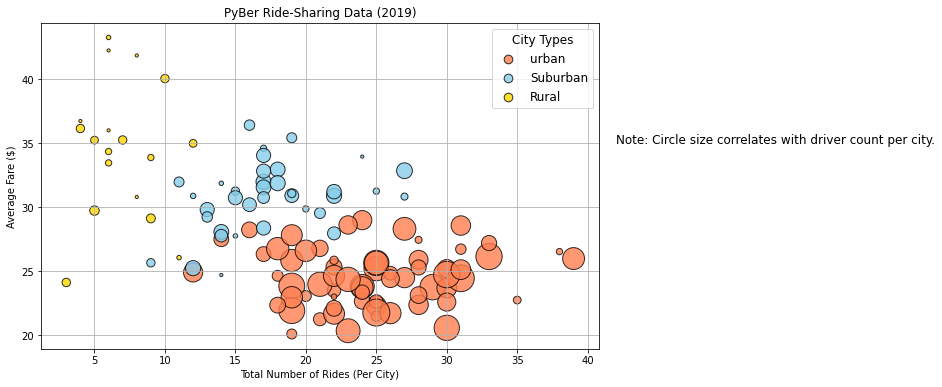

In [51]:
# Building the scatter plots for urban cities.
plt.subplots(figsize=(10,6))
plt.scatter(urbanRideCount, urbanAvgFare, 
            s=10*urbanDriverCount, c='coral', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='urban')


# Building the scatter plots for suburban cities.
plt.scatter(subRideCount, subAvgFare, 
            s=10*subDriverCount, c='skyblue', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Suburban')



# Building the scatter plots for rural cities.
plt.scatter(ruralRideCount, ruralAvgFare, 
            s=10*ruralDriverCount, c='gold', 
            edgecolor='black',linewidths=1,
            alpha=0.8, label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize="12")
#saving the figure
plt.savefig('Analysis/')
plt.show()